## Chapter 07 -- Matrix examples

Modified by kmp 2022

Sources:

https://web.stanford.edu/~boyd/vmls/

https://github.com/vbartle/VMLS-Companions

Based on "Boyd and Vandenberghe, 2021, Introduction to Applied Linear Algebra: Vectors, Matrices, and Least Squares - Julia Language Companion" https://web.stanford.edu/~boyd/vmls/vmls-julia-companion.pdf


In [1]:
using LinearAlgebra
using VMLS

### 7.1 Geometric transformations

The plane-rotation matrix, that rotates a set of points $π/3$ radians ($60^{\circ}$), is given by:

In [2]:
Rot(theta) = [cos(theta) -sin(theta); sin(theta) cos(theta)]

R = Rot(pi/3)

2×2 Array{Float64,2}:
 0.5       -0.866025
 0.866025   0.5     

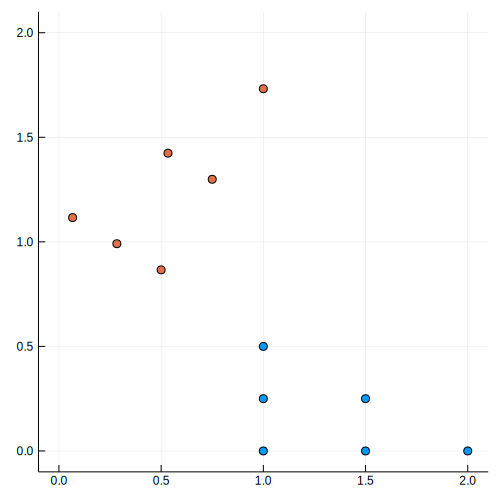

In [3]:
# array of 2-D points
points = [[1,0], [1.5,0], [2,0], [1,0.25], [1.5, 0.25], [1,.5]]

# rotated points by comprehension
rpoints = [R*p for p in points]

using Plots # plot original and rotated points

scatter([c[1] for c in points], [c[2] for c in points])
scatter!([c[1] for c in rpoints], [c[2] for c in rpoints])
plot!(lims = (-0.1, 2.1), size = (500,500), legend = false)

**Figure 7.1** Counterclockwise rotation by 60 degrees applied to six points.

### 7.2 Selectors
**Reverser matrix.** The reverser matrix can be created from an identity matrix by reversing the order of its rows. The Julia command **`reverse(A, dims=1)`** reverses the order of the rows of a matrix; **`flipdim(A, dims=2)`** reverses the order of the columns. 

Multiplying a vector with a reverser matrix is the same as reversing the order of its entries directly.

In [4]:
reverser(n) = reverse(eye(n), dims=1)

reverser (generic function with 1 method)

In [5]:
A = reverser(5)

5×5 Array{Float64,2}:
 0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0

In [6]:
x = [1., 2., 3., 4., 5.]

A*x # reverse x by multiplying with reverser matrix

5-element Array{Float64,1}:
 5.0
 4.0
 3.0
 2.0
 1.0

In [7]:
reverse(x) # reverse x directly

5-element Array{Float64,1}:
 5.0
 4.0
 3.0
 2.0
 1.0

**Permutation matrix.** Let us create a permutation matrix and use it to permute the entries of a vector. 

In Julia, there is no reason to create a matrix to carry out the permutation, since we can do the same thing directly by passing in the permuted indexes to the vector.

In [2]:
A = [0 0 1; 1 0 0; 0 1 0]
x = [0.2, -1.7, 2.4]

y = A*x # permutes entries of x to [x[3],x[1],x[2]]

z = x[[3, 1, 2]] # same using permuted indices

hcat(y, z)

3×2 Matrix{Float64}:
  2.4   2.4
  0.2   0.2
 -1.7  -1.7

### 7.3 Incidence matrix
**Incidence matrix of a graph.** We create the incidence matrix of the network shown in Figure [7.3](https://web.stanford.edu/~boyd/vmls/vmls.pdf#figure.7.3) in VMLS. 

In [5]:
 A = [-1 -1 0 1 0; 1 0 -1 0 0 ; 0 0 1 -1 -1; 0 1 0 0 1]

4×5 Matrix{Int64}:
 -1  -1   0   1   0
  1   0  -1   0   0
  0   0   1  -1  -1
  0   1   0   0   1

In [6]:
xcirc = [1, -1, 1, 0, 1] # a circulation

5-element Vector{Int64}:
  1
 -1
  1
  0
  1

In [7]:
A*xcirc

4-element Vector{Int64}:
 0
 0
 0
 0

In [8]:
s = [1, 0, -1,0] # source vector
x = [0.6, 0.3, 0.6, -0.1, -0.3]; # flow vector
A*x + s # total inflow at each node

4-element Vector{Float64}:
 1.1102230246251565e-16
 0.0
 0.0
 0.0

**Dirichlet energy.** On page [135](https://web.stanford.edu/~boyd/vmls/vmls.pdf#section*.172) of VMLS we compute the **Dirichlet energy** of two potential vectors associated with the graph of Figure [7.2](https://web.stanford.edu/~boyd/vmls/vmls.pdf#figure.7.2) in VMLS.

In [9]:
A = [-1 -1 0 1 0; 1 0 -1 0 0; 0 0 1 -1 -1; 0 1 0 0 1]

4×5 Matrix{Int64}:
 -1  -1   0   1   0
  1   0  -1   0   0
  0   0   1  -1  -1
  0   1   0   0   1

In [12]:
vsmooth = [1, 2, 2, 1]

4-element Vector{Int64}:
 1
 2
 2
 1

In [11]:
vrough = [1, -1, 2, -1]

4-element Vector{Int64}:
  1
 -1
  2
 -1

In [13]:
norm(A'*vsmooth)^2, norm(A'*vrough)^2 # Dirichlet energy

(2.9999999999999996, 27.0)

### 7.4 Convolution
The Julia package **`DSP` (Digital Signal Processing)** includes a convolution function **`conv`**. After adding this package, **`conv(a,b)`** can be used to compute the convolution of the vectors `a` and `b`. Let’s use this to find the coefficients of the polynomial 
$$
p(x) = (1 + x)(2 − x+ x^2)(1 + x− 2x^2) = 2 + 3x− 3x^2 − x^3 + x^4 − 2x^5.
$$

In [14]:
#import Pkg; Pkg.add("DSP")

    Updating registry at `C:\Users\kmpetersson\.julia\registries\General.toml`


   Resolving package versions...

   Installed MKL_jll ───── v2022.1.0+0


   Installed DSP ───────── v0.7.7
   Installed Polynomials ─ v3.2.0


    Updating `C:\Users\kmpetersson\.julia\environments\v1.8\Project.toml`
  [717857b8] + DSP v0.7.7
    Updating `C:\Users\kmpetersson\.julia\environments\v1.8\Manifest.toml`


  [717857b8] + DSP v0.7.7
  [7a1cc6ca] + FFTW v1.5.0
  [f27b6e38] + Polynomials v3.2.0
  [f5851436] + FFTW_jll v3.3.10+0
  [1d5cc7b8] + IntelOpenMP_jll v2018.0.3+2
  [856f044c] + MKL_jll v2022.1.0+0
  [4af54fe1] + LazyArtifacts


Precompiling 

project...


  ✓ IntelOpenMP_jll


  ✓ FFTW_jll


  ✓ MKL_jll


  ✓ Polynomials


  ✓ FFTW


  ✓ DSP


  6 dependencies successfully precompiled in 9 seconds. 129 already precompiled. 1 skipped during auto due to previous errors.


In [15]:
using DSP

a = [1, 1]       # coefficients of 1+x
b = [2, -1, 1]    # coefficients of 2-x+x^2
c = [1, 1, -2]    # coefficients of 1+x-2x^2
d = conv(conv(a,b),c) # coefficients of product

6-element Vector{Int64}:
  2
  3
 -3
 -1
  1
 -2

Let us write a function that creates a $Toeplitz$ matrix, and check it against the **`conv`** function. We will also see that Julia is using the very efficient method for computing the convolution.

To construct the $Toeplitz$ matrix $T(b)$ defined in equation ([7.3](https://web.stanford.edu/~boyd/vmls/vmls.pdf#equation.7.4.3)) of VMLS, we first create a zero matrix of the correct dimensions $((n + m − 1) × n)$ and then add the coefficients $b_i$, one by one. 

Single-index indexing comes in handy for this purpose. The single-index indexes of the elements $b_i$ in the matrix $T(b)$ are $i, i+m+ n, i+ 2(m+n),..., i+(n−1)(m+ n)$. 

In [16]:
function toeplitz(b, n)
    m = length(b)
    T = zeros(n+m-1, n)
    for i=1:m
        T[i : n+m : end] .= b[i]
    end
    return T
end

b = [-1,2,3]; a = [-2,3,-1,1];

Tb = toeplitz(b, length(a))

6×4 Matrix{Float64}:
 -1.0   0.0   0.0   0.0
  2.0  -1.0   0.0   0.0
  3.0   2.0  -1.0   0.0
  0.0   3.0   2.0  -1.0
  0.0   0.0   3.0   2.0
  0.0   0.0   0.0   3.0

In [17]:
Tb*a, conv(b,a)

([2.0, -7.0, 1.0, 6.0, -1.0, 3.0], [2, -7, 1, 6, -1, 3])

In [18]:
m = 2000; n = 2000;
b = randn(n); a=randn(m);

@time ctoep = toeplitz(b,n)*a;
@time cconv = conv(a,b);

norm(ctoep - cconv)

  0.086813 seconds (80.60 k allocations: 65.270 MiB, 11.16% gc time, 33.79% compilation time)
  0.010876 seconds (128 allocations: 163.359 KiB, 32.85% compilation time)

1.5196124589642094e-12